<a href="https://colab.research.google.com/github/meghanagpudi/INFO-5502-Meghana/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

data = "https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/"
dataframe = pd.read_csv(data+'train_luc.csv', header=0)
def data_Extraction():
    
    dataframe['day'] = pd.DatetimeIndex(dataframe['datetime']).day
    dataframe['month']=pd.DatetimeIndex(dataframe['datetime']).month
    dataframe['hour']=pd.DatetimeIndex(dataframe['datetime']).hour
    dataframe['year']=pd.DatetimeIndex(dataframe['datetime']).year

    print(dataframe.head(5))

data_Extraction()

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  day  month  hour  year  
0        81        0.0       3          13     16    1      1     0  2011  
1        80        0.0       8          32     40    1      1     1  2011  
2        80        0.0       5          27     32    1      1     2  2011  
3        75        0.0       3          10     13    1      1     3  2011  
4        75        0.0       0           1      1    1      1     4  2011  


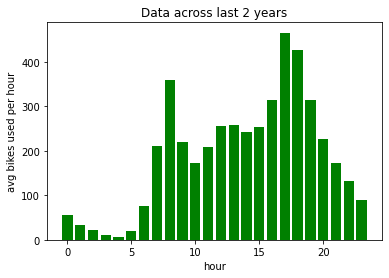

In [2]:
def hour_level_usage():
    hours = np.unique(dataframe['hour'])
    avg_usage_per_hour = {}
    for hour in hours:
        df1 = dataframe.loc[dataframe['hour'] == hour]
        avg_usage_per_hour[hour] = df1['count'].mean()
    hours = list(avg_usage_per_hour.keys())
    bike_usage = list(avg_usage_per_hour.values())
    plot.xlabel("hour")
    plot.ylabel("avg bikes used per hour")
    plot.title("Data across last 2 years")
    plot.bar(hours,bike_usage, color='green')
hour_level_usage()

seasons: [1 2 3 4]


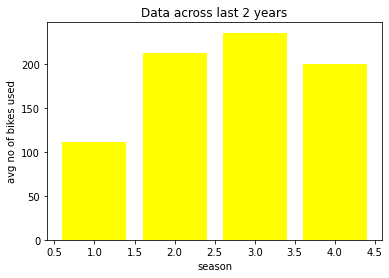

In [3]:
def season_level_usage():
    seasons = np.unique(dataframe['season'])
    print("seasons:",seasons)
    avg_usage_per_season = {}
    for season in seasons:
        df2 = dataframe.loc[dataframe['season'] == season]
        avg_usage_per_season[season] = df2['count'].mean()
    bike_usage_per_season = list(avg_usage_per_season.values())
    plot.xlabel("season")
    plot.ylabel("avg no of bikes used")
    plot.title("Data across last 2 years")
    plot.bar(seasons, bike_usage_per_season, color="yellow")
    
season_level_usage()

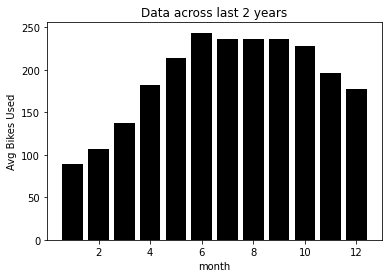

In [4]:
def monthly_bike_usage():
    months = np.unique(dataframe['month'])
    avg_usage_per_month = {}
    for month in months:
        df1 = dataframe.loc[dataframe["month"] == month]
        avg_usage_per_month[month] = df1['count'].mean()
    plot.xlabel("month")
    plot.ylabel("Avg Bikes Used")
    plot.title("Data across last 2 years")
    plot.bar(months,list(avg_usage_per_month.values()), color='black')
    
monthly_bike_usage()

In [6]:
columns = ["day","hour","month","season",] 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold as cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#using randomforest model as per assignment

regression_model = RandomForestRegressor(n_estimators = 1)
cross_validation = cross_validate(n_splits=3, shuffle=True)
cross_validation.get_n_splits()
cross_validation.split(dataframe)

<generator object _BaseKFold.split at 0x7f099ec3ced0>

In [8]:
# common methods for future usage
def fit_model(x, y):
  regression_model.fit(x,y)
def model_prediction(x):
  return regression_model.predict(x)
def rms(x,y):
  val = np.sqrt(mean_squared_error(x,y))
  return val

In [9]:
# preprocessing data for test train data split
X, y, casual_drivers ,registered_drivers = dataframe[columns], dataframe['count'].values, dataframe['casual'].values, dataframe['registered'].values
X,y,casual_drivers, registered_drivers = preprocessing.scale(X) ,preprocessing.scale(y) ,preprocessing.scale(casual_drivers), preprocessing.scale(registered_drivers)  

#splitting data to test and training using train_test_split
X_train_casual,X_test_casual,casual_train,casual_test = train_test_split(X,casual_drivers,test_size=0.2)
X_train_registered,X_test_registered,registered_train,registered_test = train_test_split(X,registered_drivers,test_size=0.2)

for train_index, test_index in cross_validation.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [10]:
# Get prediction values using RandomForest Regression model
fit_model(X_train, y_train)
fit_model(X_train_casual, casual_train)
fit_model(X_train_registered, registered_train)

# predict on the testing subset of the original training data
prediction_count = model_prediction(X_test)
casual_prediction = model_prediction(X_test_casual)
registered_prediction = model_prediction(X_test_registered)

print("prediction_count:", prediction_count)
print("casual_prediction:", casual_prediction)
print("registered_prediction:", registered_prediction)

prediction_count: [-1.01387785 -1.02083274 -0.98605829 ...  0.41816699  1.18651668
  0.45128551]
casual_prediction: [ 0.9844937   0.19296105 -0.95293977 ... -0.42966714 -0.50252789
 -0.94631607]
registered_prediction: [-0.6835758  -0.5157753   0.18633735 ... -0.33693528 -0.39654862
  1.74953153]


In [11]:
# RMS calculation
val1 = np.sqrt(mean_squared_error(y_test,prediction_count))
val2 = np.sqrt(mean_squared_error(casual_test,casual_prediction))
val3 = np.sqrt(mean_squared_error(registered_test,registered_prediction))
print("Root Mean Sqaured Error -- Count Prediction:",val1)
print("Root Mean Sqaured Error -- casual drivers Prediction:",val2)
print("Root Mean Sqaured Error -- Registered drivers Prediction:",val3)


Root Mean Sqaured Error -- Count Prediction: 0.7502571816889003
Root Mean Sqaured Error -- casual drivers Prediction: 1.0837614387820613
Root Mean Sqaured Error -- Registered drivers Prediction: 0.9686861481740092


In [12]:
test_dataframe = pd.read_csv(data+'test_luc.csv', header=0)
test_dataframe['month'] = pd.DatetimeIndex(test_dataframe['datetime']).month
test_dataframe['hour'] = pd.DatetimeIndex(test_dataframe['datetime']).hour
test_dataframe['day'] = pd.DatetimeIndex(test_dataframe['datetime']).day

# fit model using whole training data set without splitting
fit_model( dataframe[columns], dataframe['count'])
fit_model( dataframe[columns], dataframe['casual'])
fit_model( dataframe[columns], dataframe['registered'])

#predict on test data using trained model

count_prediction = model_prediction(test_dataframe[columns])
casual_prediction = model_prediction(test_dataframe[columns])
print("count_prediction", count_prediction, casual_prediction)

test_dataframe['count'] = count_prediction
test_dataframe['finalcount'] = count_prediction + casual_prediction
test_dataframe = test_dataframe[['datetime','count', 'finalcount']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Done !!")


count_prediction [ 23.    18.75  14.   ...  93.   100.    50.  ] [ 23.    18.75  14.   ...  93.   100.    50.  ]
Done !!


In [13]:
# printing the sample of output csv
prediction_data = pd.read_csv("my_prediction.csv")
print(prediction_data.head(5))
len(prediction_data)

print("completed!!!!")

              datetime      count  finalcount
0  2011-01-17 00:00:00  23.000000   46.000000
1  2011-01-17 01:00:00  18.750000   37.500000
2  2011-01-17 02:00:00  14.000000   28.000000
3  2011-01-17 03:00:00   5.000000   10.000000
4  2011-01-17 04:00:00   4.333333    8.666667
completed!!!!


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [14]:
### You code here:


